# Introducción al análisis de datos

## Configuración

In [1]:
from visual_aids import stats_viz

## Fundamentos del análisis de datos
Al realizar un análisis de datos, nos moveremos entre cuatro procesos principales:

- **Recogida de datos**: Todo análisis comienza con la recopilación de datos. Podemos recopilar datos de diversas fuentes, como bases de datos, API, archivos planos e Internet.
- **Gestión de datos**: Una vez que tenemos los datos, tenemos que prepararlos para el análisis. Esto puede implicar remodelarlos, cambiar los tipos de datos, tratar los valores que faltan y/o agregarlos.
- **Análisis exploratorio de datos (AED)**: Podemos utilizar visualizaciones para explorar nuestros datos y resumirlos. Durante este tiempo, también comenzaremos a explorar los datos observando su estructura, formato y estadísticas de resumen.
- **Extracción de conclusiones**: Después de haber explorado a fondo nuestros datos, podemos intentar sacar conclusiones o modelizarlos.

## Fundamentos estadísticos
Como éste no es un libro de estadística, discutiremos los conceptos que necesitaremos para trabajar a lo largo del libro, además de algunas vías para seguir explorando. Esto no es en absoluto exhaustivo.

### Muestreo
Algunas técnicas de remuestreo (muestreo a partir de la muestra) que veremos a lo largo del libro, especialmente en los capítulos sobre aprendizaje automático (9-11):
- **muestreo aleatorio simple**: elección con un generador de números aleatorios
- **muestreo aleatorio estratificado**: elección aleatoria preservando la proporción de grupos en los datos
- muestreo con reemplazo (más información: [vídeo de YouTube](https://www.youtube.com/watch?v=gcPIyeqymOU) y [artículo de Wikipedia](https://en.wikipedia.org/wiki/Bootstrapping_(estadística))

### Estadística descriptiva
Utilizamos la estadística descriptiva para describir los datos. Los datos con los que trabajamos suelen ser una **muestra** tomada de la **población**. Los estadísticos que discutiremos aquí se denominan **estadísticos muestrales** porque se calculan sobre la muestra y pueden utilizarse como estimadores de los parámetros poblacionales.

#### Medidas de centro
Tres formas comunes de describir la tendencia central de una distribución son la media, la mediana y la moda.
##### Media
La media muestral es un estimador de la media poblacional ($\mu$) y se define como:

$$\bar{x} = \frac{\sum_{1}^{n} x_i}{n}$$
##### Mediana
La mediana representa el percentil 50<sup>ésimo</sup> de nuestros datos; esto significa que el 50% de los valores son mayores que la mediana y el 50% son menores que la mediana. Se calcula tomando el valor medio de una lista ordenada de valores.

##### Moda
La moda es el valor más común de los datos. Se puede utilizar para describir datos categóricos o, en el caso de datos continuos, la forma de la distribución:

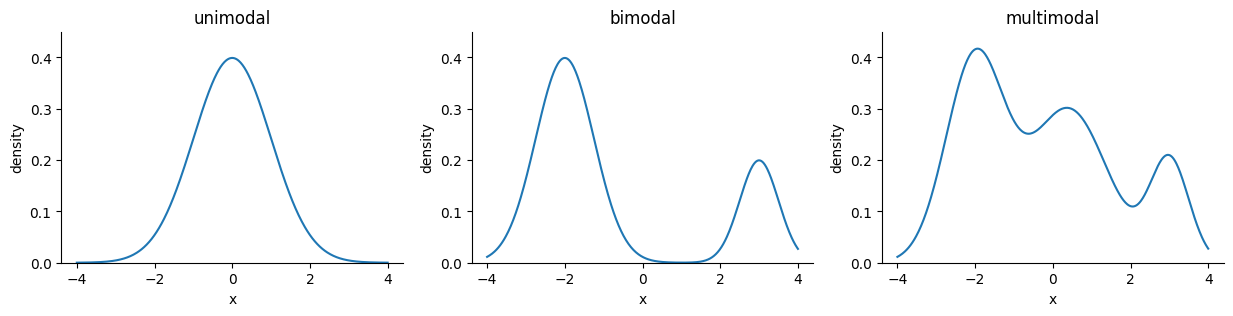

In [2]:
ax = stats_viz.different_modal_plots()

#### Medidas de dispersión
Las medidas de dispersión nos indican cómo están dispersos los datos; esto nos indicará lo fina (poca dispersión) o ancha (muy dispersa) que es nuestra distribución.

##### Rango
El rango es la distancia entre el valor más pequeño (mínimo) y el valor más grande (máximo):

$$rango = max(X) - min(X)$$

##### Varianza
La varianza describe la distancia que separa las observaciones de su valor medio (la media). Al calcular la varianza de la muestra, dividimos por *n - 1* en lugar de *n* para tener en cuenta el uso de la media de la muestra ($\bar{x}$):

$$s^2 = \frac{\sum_{1}^{n} (x_i - \bar{x})^2}{n - 1}$$

Se denomina corrección de Bessel y se aplica para obtener un estimador insesgado de la varianza poblacional.

*Note that this will be in units-squared of whatever was being measured.*

##### Desviación estándar
La desviación típica es la raíz cuadrada de la varianza, lo que nos da una medida en las mismas unidades que nuestros datos. La desviación estándar de la muestra se calcula de la siguiente manera:

$$s = \sqrt{\frac{\sum_{1}^{n} (x_i - \bar{x})^2}{n - 1}} = \sqrt{s^2}$$

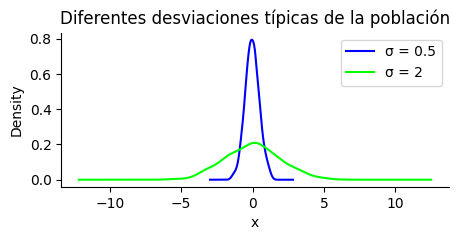

In [3]:
ax = stats_viz.effect_of_std_dev()

*Tenga en cuenta que $\sigma^2$ es la varianza de la población y $\sigma$ es la desviación estándar de la población.*

##### Coeficiente de variación
El coeficiente de variación (CV) nos da una relación sin unidades entre la desviación típica y la media. Como no tiene unidades, podemos comparar la dispersión entre conjuntos de datos:

$$CV = \frac{s}{\bar{x}}$$

##### Rango intercuartílico
El rango intercuartílico (IQR) nos da la dispersión de los datos alrededor de la mediana y cuantifica cuánta dispersión tenemos en el 50% medio de nuestra distribución:

$$IQR = Q_3 - Q_1$$

##### Coeficiente de dispersión por cuartiles
El coeficiente de dispersión por cuartiles también es una estadística sin unidades para comparar conjuntos de datos. Sin embargo, utiliza la mediana como medida del centro. Se calcula dividiendo el rango semicuartílico (la mitad del IQR) por la mediana (punto medio entre el primer y el tercer cuartil):

$$QCD = \frac{\frac{Q_3 - Q_1}{2}}{\frac{Q_1 + Q_3}{2}} = \frac{Q_3 - Q_1}{Q_3 + Q_1}$$

#### Resumen de datos
El **resumen de 5 números** proporciona 5 estadísticas descriptivas que resumen nuestros datos:

| | Cuartil | Estadistico | Percentil |
| --- | --- | --- | --- |
|1.|$Q_0$|minimum|$0^{th}$|
|2.|$Q_1$|N/A|$25^{th}$|
|3.|$Q_2$|median|$50^{th}$|
|4.|$Q_3$|N/A|$75^{th}$|
|5.|$Q_4$|maximum|$100^{th}$|

Este resumen puede visualizarse mediante un **trazado de caja** (también llamado trazado de caja y bigotes). La caja tiene un límite superior de $Q_3$ y un límite inferior de $Q_1$. La mediana será una línea en algún lugar de esta caja. Los bigotes se extienden desde la caja hacia el mínimo/máximo. Para nuestros propósitos, se extenderán hasta $Q_3 + 1,5 \times IQR$ y $Q_1 - 1,5 \times IQR$ y todo lo que vaya más allá se representará como puntos individuales para valores atípicos:

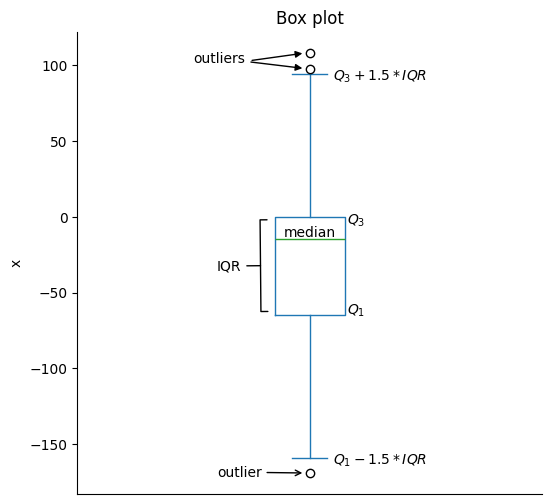

In [4]:
ax = stats_viz.example_boxplot()

El diagrama de caja no nos muestra cómo se distribuyen los datos dentro de los cuartiles. Para tener una mejor idea de la distribución, podemos utilizar un **histograma**, que nos mostrará la cantidad de observaciones que caen en intervalos de igual anchura. Podemos variar el número de intervalos a utilizar, pero tenga en cuenta que esto puede cambiar nuestra impresión de lo que parece ser la distribución:

c:\Users\Usuario\OneDrive\Documentos\GitHub\.venv\lib\site-packages\matplotlib\text.py:1461: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(x))
c:\Users\Usuario\OneDrive\Documentos\GitHub\.venv\lib\site-packages\matplotlib\text.py:894: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))
c:\Users\Usuario\OneDrive\Documentos\GitHub\.venv\lib\site-packages\matplotlib\text.py:753: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))


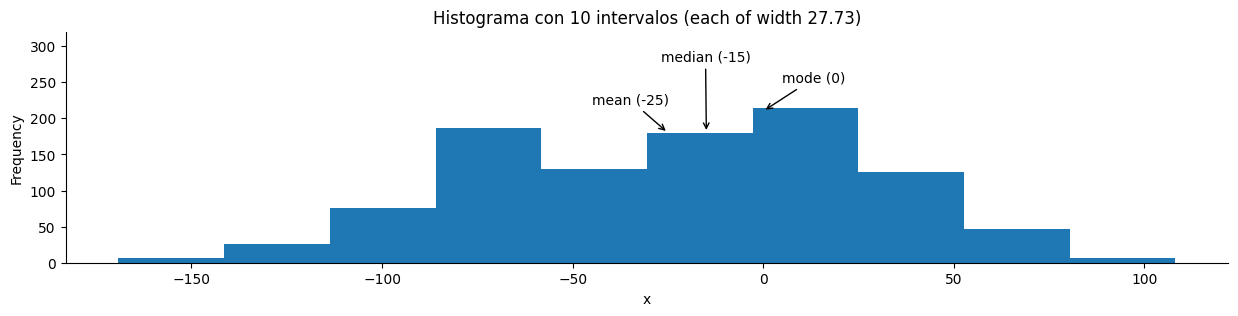

In [5]:
ax = stats_viz.example_histogram()

También podemos visualizar la distribución utilizando una **estimación de la densidad del núcleo (KDE)**. Esto estimará la **función de densidad de probabilidad (PDF)**. Esta función muestra cómo se distribuye la probabilidad sobre los valores. Los valores más altos de la PDF significan mayores probabilidades:

c:\Users\Usuario\OneDrive\Documentos\GitHub\.venv\lib\site-packages\matplotlib\text.py:1461: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(x))
c:\Users\Usuario\OneDrive\Documentos\GitHub\.venv\lib\site-packages\matplotlib\text.py:753: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
c:\Users\Usuario\OneDrive\Documentos\GitHub\.venv\lib\site-packages\matplotlib\text.py:894: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))


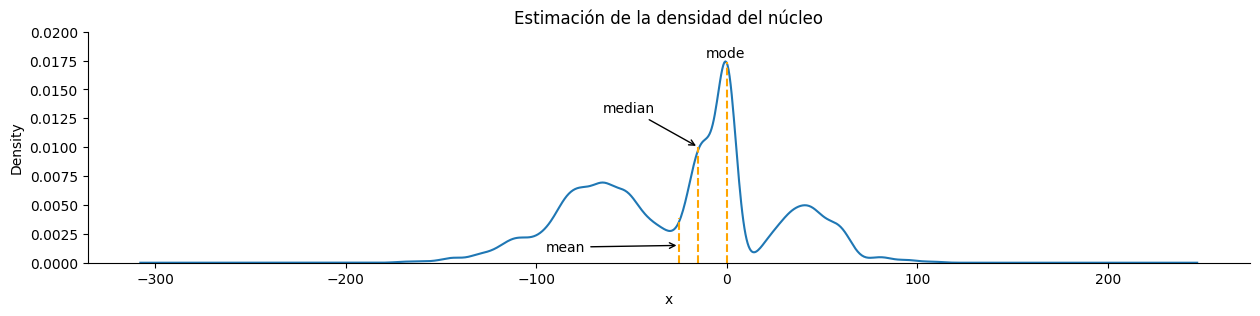

In [6]:
ax = stats_viz.example_kde()

Obsérvese que tanto la KDE como el histograma estiman la distribución:

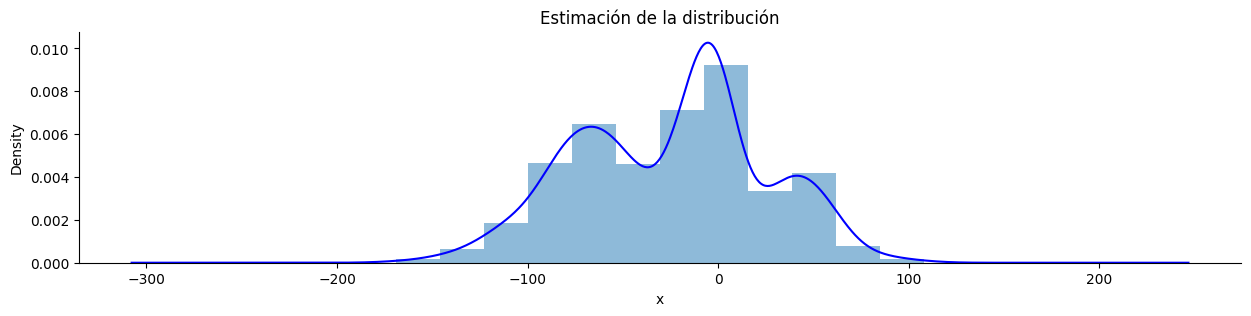

In [7]:
ax = stats_viz.hist_and_kde()

**Las distribuciones asimétricas** tienen más observaciones en un lado. La media será menor que la mediana con sesgo negativo, mientras que con sesgo positivo ocurre lo contrario:

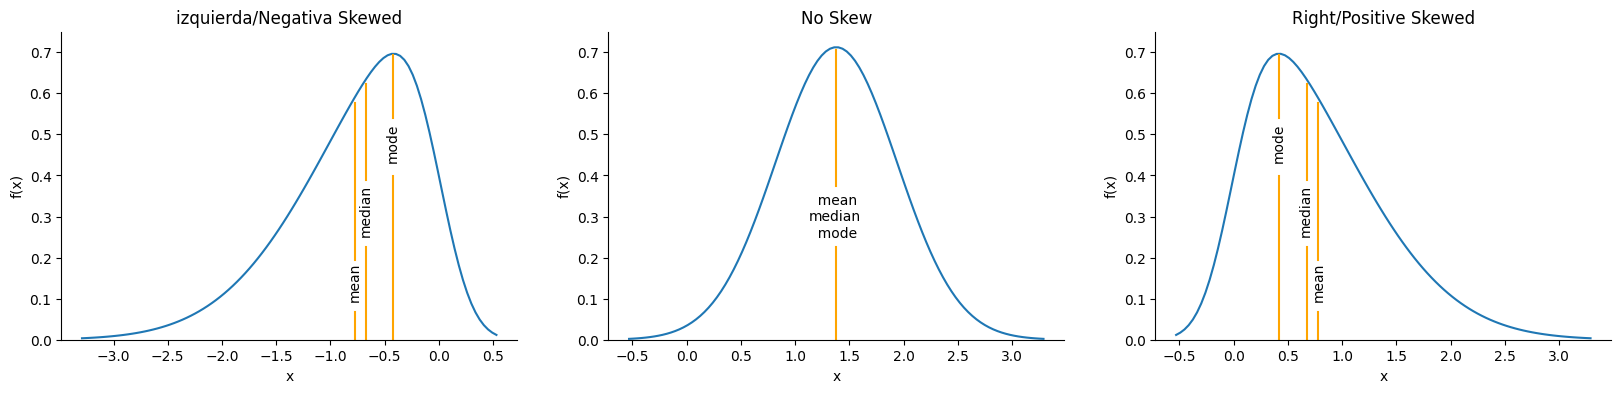

In [8]:
ax = stats_viz.skew_examples()

Podemos utilizar la **función de distribución acumulativa (FDA)** para hallar probabilidades de obtener valores dentro de un rango determinado. La CDF es la integral de la PDF:

$$CDF = F(x) = \int_{-\infty}^{x} f(t) dt$$
 
*Nótese que $f(t)$ es la FDP y $\int_{-\infty}^{\infty} f(t) dt = 1$.*

La probabilidad de que la variable aleatoria $X$ sea menor o igual que el valor específico de $x$ se denota como $P(X ≤ x)$. Obsérvese que para una variable aleatoria continua la probabilidad de que sea exactamente $x$ es cero.

Veamos la estimación de la FDA a partir de los datos de la muestra que utilizamos para el diagrama de caja, denominada **función de distribución acumulativa empírica (FDAE)**:

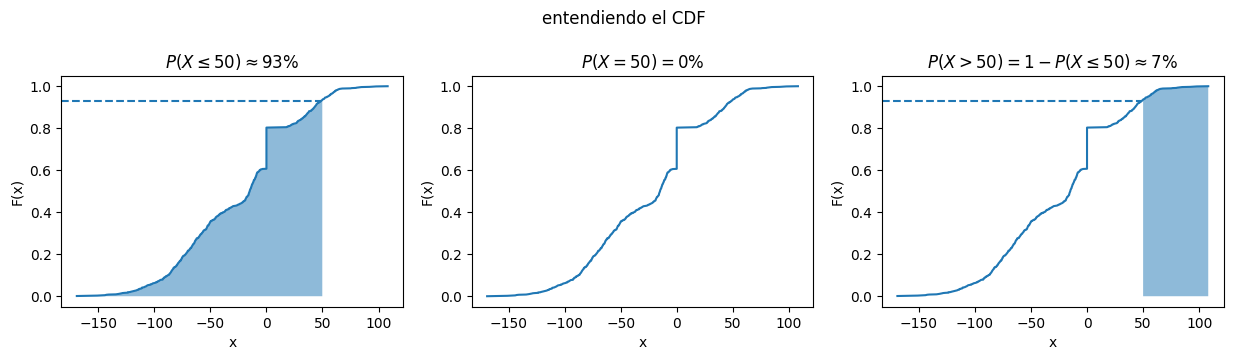

In [9]:
ax = stats_viz.cdf_example()

*Podemos encontrar cualquier rango que queramos si usamos algo de álgebra como en el subgrupo de la derecha de arriba.*

#### Distribuciones comunes
- **Distribución gaussiana (normal)**: se parece a una campana de Gauss y está parametrizada por su media (μ) y su desviación típica (σ). Muchas cosas en la naturaleza siguen la distribución normal, como las alturas. Tenga en cuenta que comprobar si una distribución es normal no es trivial. Se escribe como $N(\mu, \sigma)$.
- **Distribución de Poisson**: distribución discreta que se utiliza a menudo para modelizar llegadas. Parametrizada por su media, lambda (λ). Se escribe como $Pois(\lambda)$.
- **Distribución exponencial**: puede utilizarse para modelizar el tiempo entre llegadas. Parametrizada por su media, lambda (λ). Se escribe como $Exp(\lambda)$.
- **Distribución uniforme**: asigna la misma probabilidad a cada valor dentro de sus límites (*a* y *b*). Se utiliza a menudo para la generación de números aleatorios. Se escribe como $U(a, b)$.
- Distribución Bernoulli**: Cuando elegimos un número aleatorio para simular un único resultado de éxito/fracaso, se denomina ensayo de Bernoulli. Está parametrizado por la probabilidad de éxito (*p*). Se escribe como $Bernoulli(p)$.
- **Distribución binomial**: Cuando realizamos el mismo experimento *n* veces, el número total de éxitos es entonces una variable aleatoria binomial. Se escribe como $B(n, p)$.

Podemos visualizar tanto distribuciones discretas como continuas; sin embargo, las distribuciones discretas nos dan una **función másica de probabilidad** (**PMF**) en lugar de una PDF:

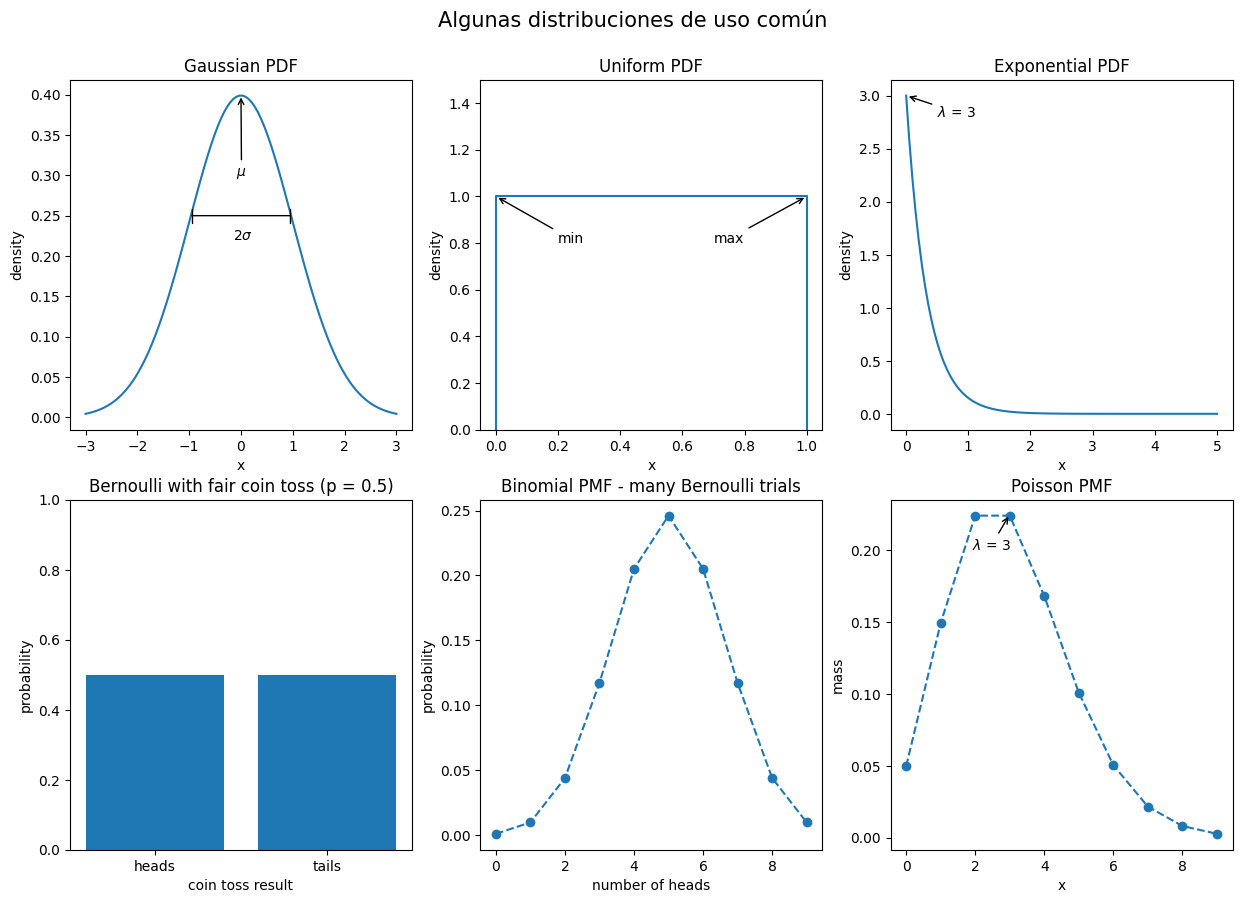

In [10]:
ax = stats_viz.common_dists()

#### Escalado de datos
Para comparar variables de diferentes distribuciones, tendríamos que escalar los datos, lo que podríamos hacer con el rango utilizando **escalado mín-máx**:

$$x_{escalado}=\frac{x - min(X)}{rango(X)}$$

Otra forma es utilizar una **puntuación Z** para estandarizar los datos:

$$z_i = \frac{x_i - \bar{x}}{s}$$

#### Cuantificación de las relaciones entre variables
La **covarianza** es un estadístico para cuantificar la relación entre variables mostrando cómo cambia una variable con respecto a otra (también denominada su varianza conjunta):

$$cov(X, Y) = E[(X-E[X])(Y-E[Y])]$$

*E[X] es la expectativa de la variable aleatoria X (su media a largo plazo)*

El signo de la covarianza nos da la dirección de la relación, pero también necesitamos la magnitud. Para ello, calculamos el **coeficiente de correlación de Pearson** ($\rho$):

$$\rho_{X, Y} = \frac{cov(X, Y)}{s_X s_Y}$$

Ejemplos:

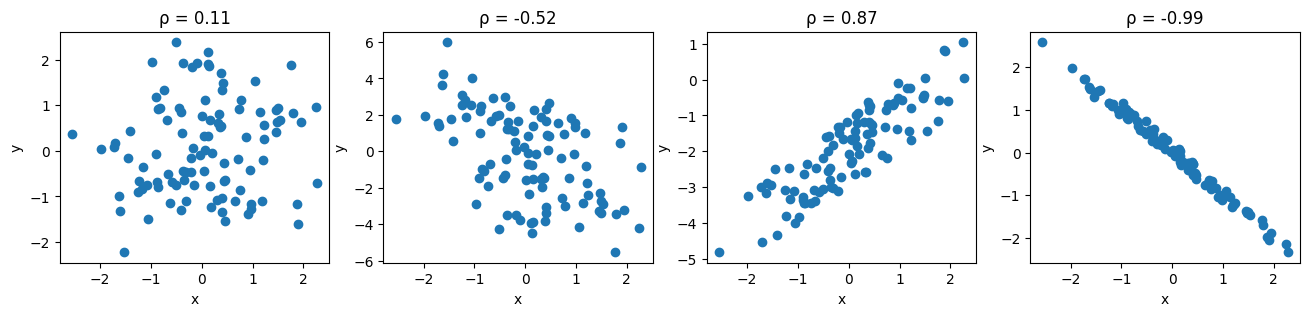

In [11]:
ax = stats_viz.correlation_coefficient_examples()

*De izquierda a derecha: sin correlación, correlación negativa débil, correlación positiva fuerte y correlación negativa casi perfecta*

A menudo, es más informativo utilizar gráficos de dispersión para comprobar las relaciones entre variables. Esto se debe a que la correlación puede ser fuerte, pero la relación puede no ser lineal:

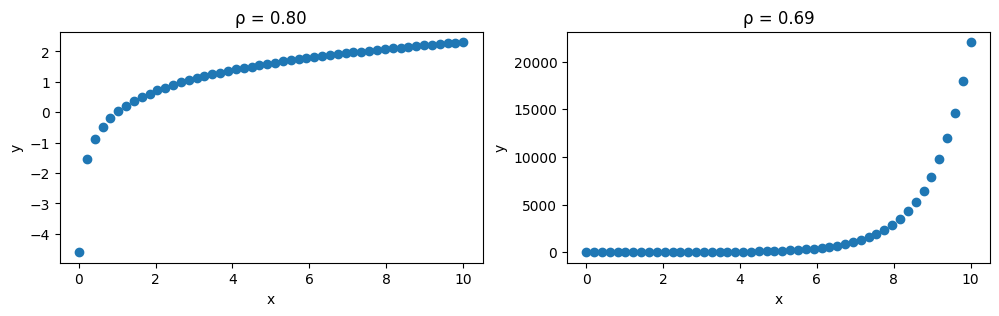

In [12]:
ax = stats_viz.non_linear_relationships()

Recuerde que **correlación no implica causalidad**. Aunque encontremos una correlación entre X e Y, no significa que X cause Y o Y cause X. Es posible que haya alguna Z que cause ambas cosas o que X cause algún acontecimiento intermedio que cause Y &mdash; incluso podría ser una coincidencia. No deje de consultar el libro de Tyler Vigen [blog Spurious Correlations](https://www.tylervigen.com/spurious-correlations) para ver algunas correlaciones interesantes.

#### Escollos de las estadísticas de síntesis
No sólo nuestros coeficientes de correlación pueden ser engañosos, sino también las estadísticas de resumen. El cuarteto de Anscombe es una colección de cuatro conjuntos de datos diferentes que tienen estadísticas de resumen y coeficientes de correlación idénticos, sin embargo, cuando se representan gráficamente, es obvio que no son similares:

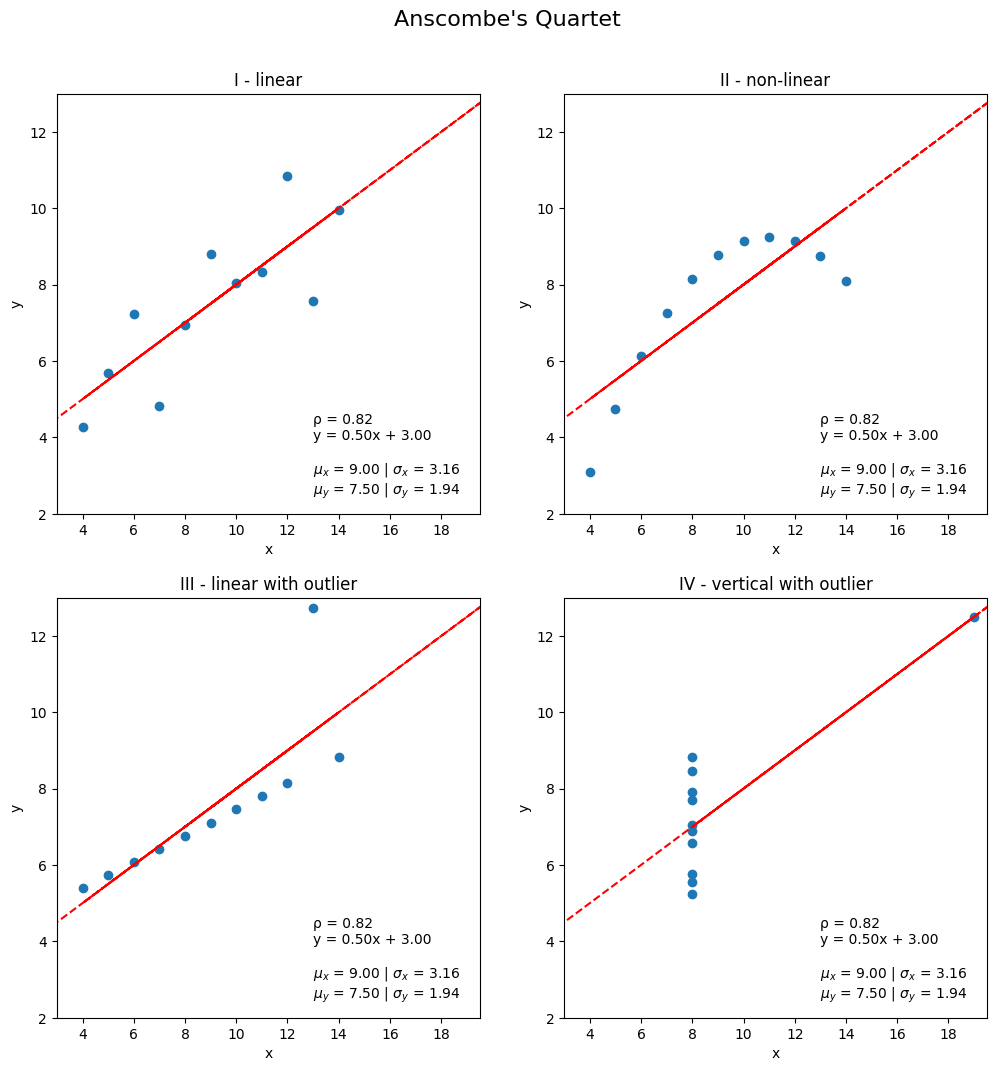

In [13]:
ax = stats_viz.anscombes_quartet()

Otro ejemplo de ello es el [Datasaurus Dozen](https://www.autodeskresearch.com/publications/samestats):

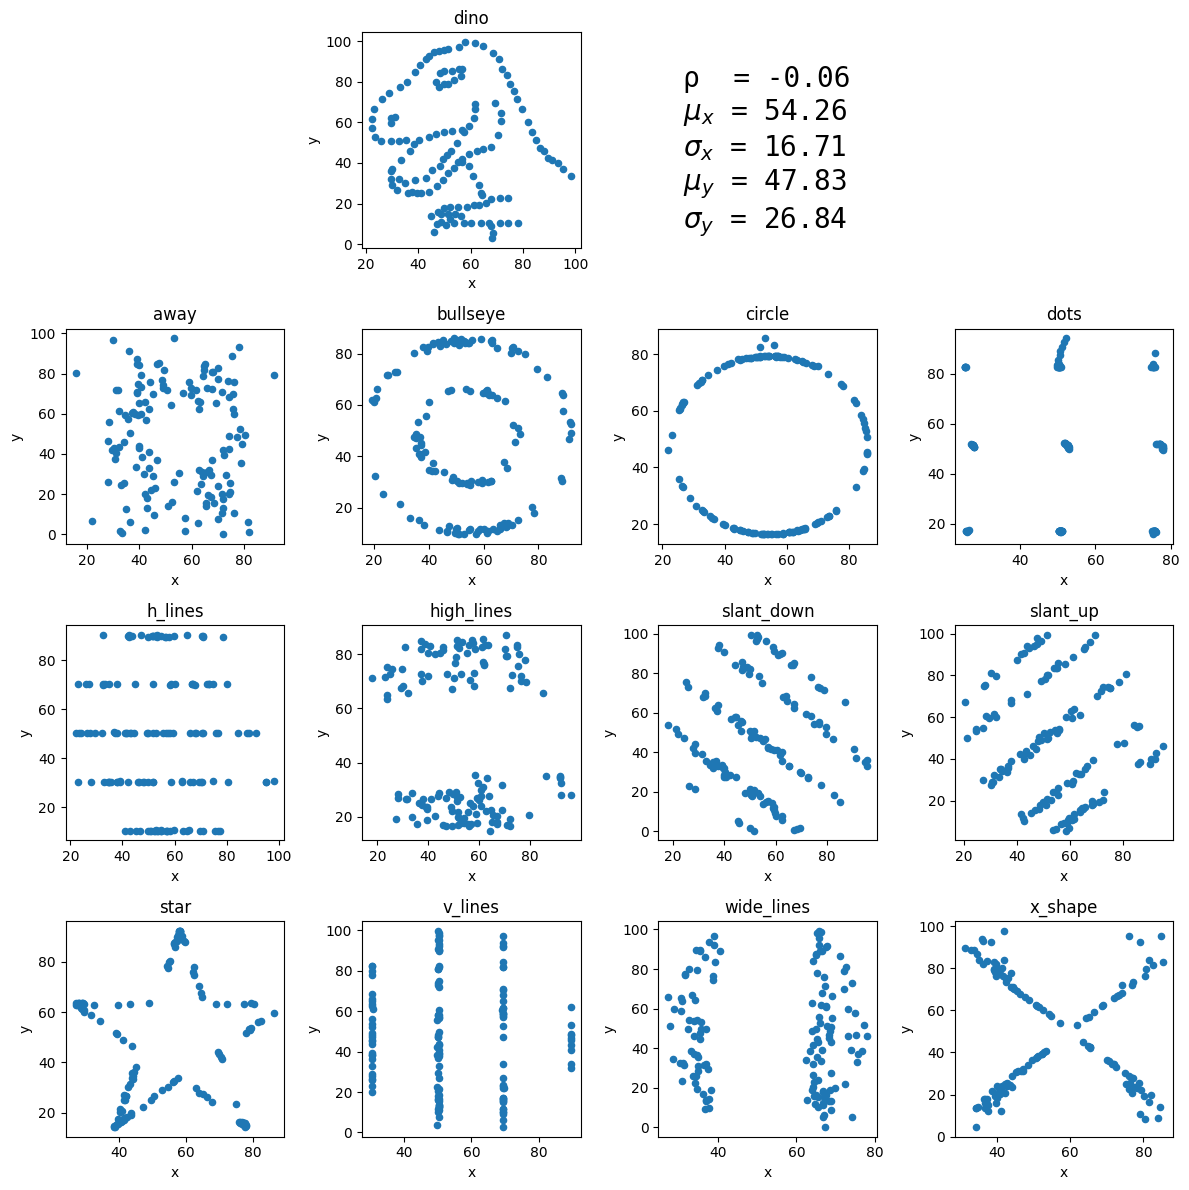

In [14]:
ax = stats_viz.datasaurus_dozen()

### Predicción y previsión
Digamos que nuestra heladería favorita nos ha pedido ayuda para predecir cuántos helados pueden esperar vender un día determinado. Están convencidos de que la temperatura exterior influye mucho en sus ventas, así que han recopilado datos sobre el número de helados vendidos a una temperatura determinada. Aceptamos ayudarles y lo primero que hacemos es hacer un diagrama de dispersión con los datos que nos han dado:

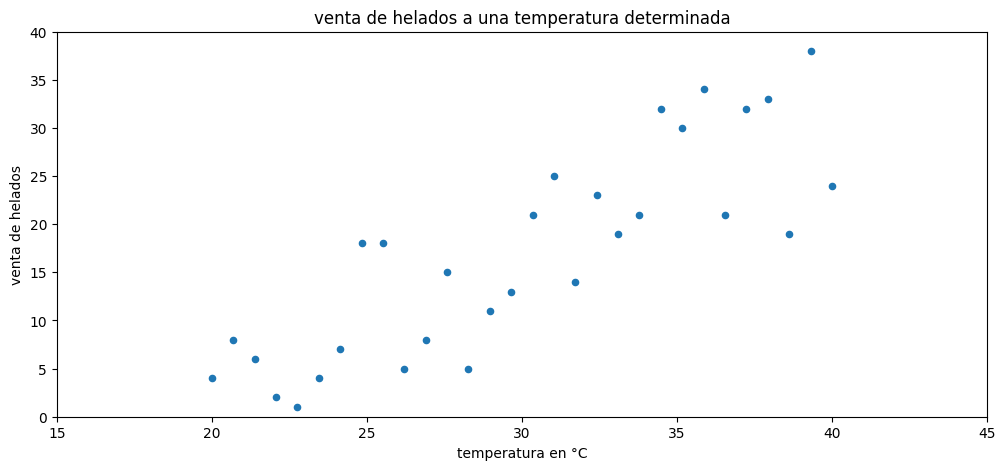

In [15]:
ax = stats_viz.example_scatter_plot()

Podemos observar una tendencia ascendente en el diagrama de dispersión: se venden más helados a temperaturas más altas. Sin embargo, para ayudar a la heladería, tenemos que encontrar una forma de hacer predicciones a partir de estos datos. Podemos utilizar una técnica llamada **regresión** para modelizar la relación entre la temperatura y las ventas de helados con una ecuación:

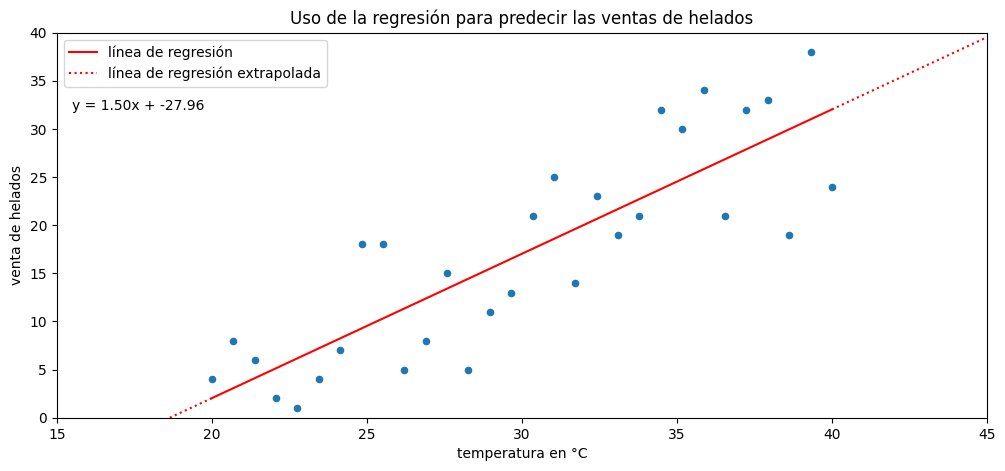

In [16]:
ax = stats_viz.example_regression()

Podemos utilizar la ecuación resultante para hacer predicciones sobre el número de helados vendidos a distintas temperaturas. Sin embargo, debemos tener en cuenta si estamos interpolando o extrapolando. Si el valor de temperatura que utilizamos para la predicción está dentro del intervalo de los datos originales que utilizamos para construir nuestro modelo de regresión, entonces estamos **interpolando** (parte sólida de la línea roja). En cambio, si la temperatura supera los valores de los datos originales, estamos **extrapolando**, lo cual es muy peligroso, ya que no podemos suponer que el patrón continúe indefinidamente en cada dirección (parte punteada de la línea). Las temperaturas extremadamente altas pueden hacer que la gente se quede en casa, lo que significa que no se venderán helados, mientras que la ecuación indica un récord de ventas.

La previsión es un tipo de predicción de series temporales. En un proceso denominado **descomposición de series temporales**, las series temporales se descomponen en un componente de tendencia, un componente de estacionalidad y un componente cíclico. Estos componentes pueden combinarse de forma aditiva o multiplicativa:

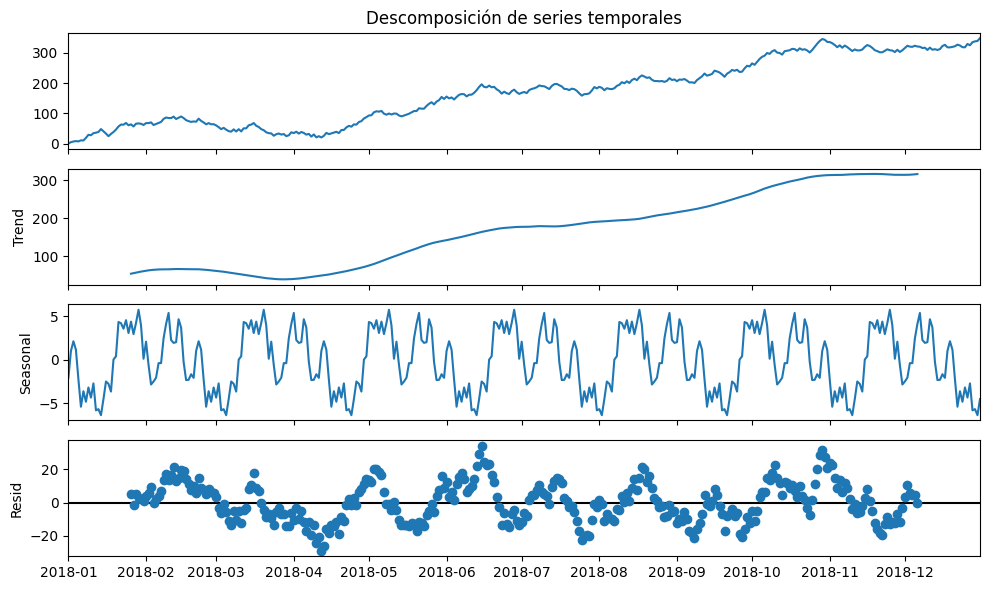

In [17]:
ax = stats_viz.time_series_decomposition_example()

El componente **tendencia** describe el comportamiento de la serie temporal a largo plazo sin tener en cuenta los efectos estacionales o cíclicos. Utilizando la tendencia, podemos hacer afirmaciones generales sobre la serie temporal a largo plazo, como: *la población de la Tierra aumenta* o *el valor de una acción se estanca*. La **estacionalidad** de una serie temporal explica los movimientos sistemáticos y relacionados con el calendario de una serie temporal. Por ejemplo, el número de camiones de helados en las calles de Nueva York es elevado en verano y desciende a cero en invierno; este patrón se repite cada año independientemente de que la cantidad real cada verano sea la misma. Por último, el componente **cíclico** tiene en cuenta cualquier otra cosa inexplicable o irregular de la serie temporal; podría ser algo como un huracán que hiciera descender el número de camiones de helados a corto plazo porque no es seguro estar al aire libre. Este componente es difícil de prever debido a su carácter inesperado.

A la hora de elaborar modelos para predecir series temporales, algunos métodos habituales son los de la familia ARIMA y el suavizado exponencial. **ARIMA** significa autorregresivo (AR), integrado (I), media móvil (MA). Los modelos autorregresivos aprovechan el hecho de que una observación en el tiempo $t$ está correlacionada con una observación anterior, por ejemplo en el tiempo $t - 1$. Tenga en cuenta que no todas las series temporales son autorregresivas. El componente integrado se refiere a los datos diferenciados, o al cambio en los datos de un momento a otro. Por último, el componente de media móvil utiliza una ventana móvil para calcular la media de las últimas $x$ observaciones, donde $x$ es la longitud de la ventana móvil. Construiremos un modelo ARIMA en el capítulo 7.

La media móvil da el mismo peso a cada período de tiempo del pasado que interviene en el cálculo. En la práctica, esto no siempre es una expectativa realista de nuestros datos. A veces, todos los valores del pasado son importantes, pero varían en su influencia sobre los puntos de datos futuros. Para estos casos, podemos utilizar el suavizado exponencial, que nos permite dar más peso a los valores más recientes y menos a los valores más alejados de lo que estamos prediciendo.

### Estadística inferencial
La estadística inferencial se ocupa de inferir o deducir cosas a partir de los datos de muestra que tenemos para hacer afirmaciones sobre el conjunto de la población. Antes de hacerlo, necesitamos saber si realizamos un estudio observacional o un experimento. Un estudio observacional no puede utilizarse para determinar la causalidad porque no podemos controlarlo todo. En cambio, un experimento está controlado.

Recuerde que los estadísticos muestrales de los que hemos hablado antes son estimadores de los parámetros de la población. Nuestros estimadores necesitan **intervalos de confianza**, que proporcionan una estimación puntual y un margen de error en torno a ella. Se trata del intervalo en el que se encontrará el verdadero parámetro poblacional con un determinado **nivel de confianza**. Con un nivel de confianza del 95%, el 95% de los intervalos de confianza calculados a partir de muestras aleatorias de la población contienen el verdadero parámetro poblacional.

También tenemos la opción de utilizar la **comprobación de hipótesis**. En primer lugar, definimos una hipótesis nula (digamos que la verdadera media de la población es 0) y, a continuación, determinamos un **nivel de significación** (1 - nivel de confianza), que es la probabilidad de rechazar la hipótesis nula cuando es cierta. Nuestro resultado es estadísticamente significativo si el valor de la hipótesis nula está fuera del intervalo de confianza. [Más información](https://statisticsbyjim.com/hypothesis-testing/hypothesis-tests-confidence-intervals-levels/).

<hr>

<div style="display: flex; justify-content: space-between; margin-bottom: 10px;">
    <div style="text-align: left;">
        <a href="./checking_your_setup.ipynb">
            <button>Compruebe su configuración</button>
        </a>
    </div>
    <div style="text-align: center;">
        <a href="./python_101.ipynb">
            <button>Python 101</button>
        </a>
        <a href="./ejercicios.ipynb">
            <button>Ejercicios</button>
        </a>
    </div>
    <div style="text-align: right;">
        <a href="../ch_02/1-pandas_data_structures.ipynb">
            <button>Capítulo 2 &#8594;</button>
        </a>
    </div>
</div>

<hr>
